# Level 2 Task 4. Restaurant Chains.ipynb

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## read csv file

In [4]:
df = pd.read_csv("D:\Data Analytics\Internships\Cognifyz\Dataset .csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


## 1. Identify if there are any restaurant chains present in the dataset.

In [5]:
restaurant_chain = df.groupby("Restaurant Name").size().reset_index(name="OutletCount")
new = restaurant_chain[restaurant_chain["OutletCount"] > 1]
restaurant_chains = new.sort_values(by="OutletCount", ascending=False)

In [6]:
print(restaurant_chains[["Restaurant Name", "OutletCount"]].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


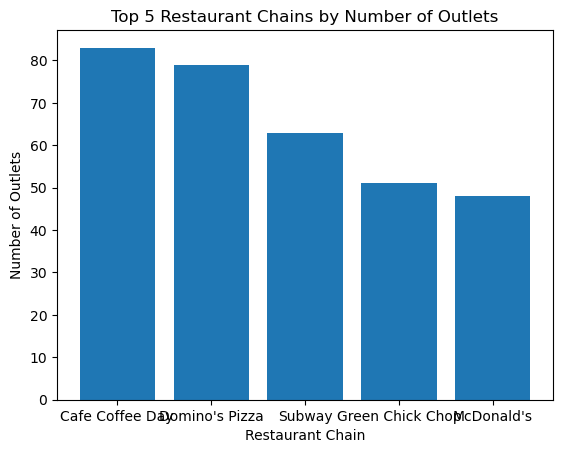

In [7]:
plt.bar(restaurant_chains["Restaurant Name"][:5], restaurant_chains["OutletCount"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

## 2. Analyze the ratings and popularity of different restaurant chains.

#### Ratings

In [11]:
ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating").sort_values(by="Average Rating", ascending=False)
ratings

,Restaurant Name,Average Rating
5322,Restaurant Mosaic @ The Orient,4.9
4177,Ministry of Crab,4.9
4135,Miann,4.9
5757,Shorts Burger and Shine,4.9
4165,Milse,4.9
...,...,...
1105,Cafe Corner,0.0
4905,Pheva Tandooris,0.0
4913,Pick & Carry,0.0
1096,Cafe Brownie,0.0


#### Popularity

In [13]:
votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes").sort_values(by="Total Votes", ascending=False)
votes

,Restaurant Name,Total Votes
663,Barbeque Nation,28142
101,AB's - Absolute Barbecues,13400
6943,Toit,10934
785,Big Chill,10853
2297,Farzi Cafe,10098
...,...,...
4375,Muncheezz,0
6217,Swiss Gourmessa,0
2110,Dosa and Pizza Corner,0
6215,Sweets n Treats,0


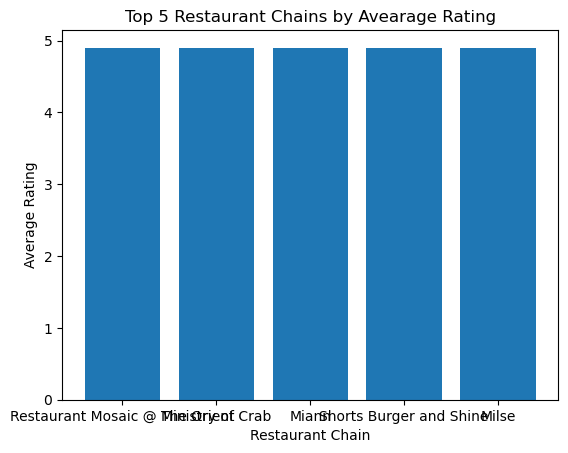

In [15]:
plt.bar(ratings["Restaurant Name"][:5], ratings["Average Rating"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chains by Avearage Rating")
plt.show()

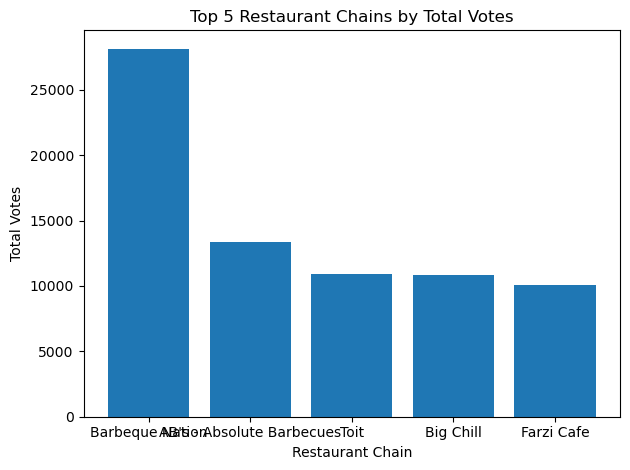

In [18]:
plt.bar(votes["Restaurant Name"][:5], votes["Total Votes"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Total Votes")
plt.tight_layout()
plt.show()